# Travel Time Data Analysis and Visualizations

## Importing Libraries and Loading Data

We utilize popular Python data analysis libraries like pandas, numpy, matplotlib, seaborn, and plotly to handle and visualize travel time data. The data is imported from an Excel file.

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [36]:
df= pd.read_excel("c:\\Users\\Jay\\Interactive Data\\Final Project\\Final_Majestic_to_AIM_jan-2016tomarch-2018.xlsx")
df

,Date,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,Daily Mean Travel Time (Seconds),Daily Range - Lower Bound Travel Time (Seconds),Daily Range - Upper Bound Travel Time (Seconds),AM Mean Travel Time (Seconds),AM Range - Lower Bound Travel Time (Seconds),...,PM Range - Upper Bound Travel Time (Seconds),Midday Mean Travel Time (Seconds),Midday Range - Lower Bound Travel Time (Seconds),Midday Range - Upper Bound Travel Time (Seconds),Evening Mean Travel Time (Seconds),Evening Range - Lower Bound Travel Time (Seconds),Evening Range - Upper Bound Travel Time (Seconds),Early Morning Mean Travel Time (Seconds),Early Morning Range - Lower Bound Travel Time (Seconds),Early Morning Range - Upper Bound Travel Time (Seconds)
0,2016-01-01 00:00:00,100,"Kempegowda, Majestic, Bengaluru, Karnataka",171,"Analytics India Magazine, #280, 2nd floor, 5th...",2309,1719,3102,2209.0,1792.0,...,3586,2674.0,2185.0,3274.0,2011,1596,2534,1945,1390,2723
1,2016-01-02 00:00:00,100,"Kempegowda, Majestic, Bengaluru, Karnataka",171,"Analytics India Magazine, #280, 2nd floor, 5th...",2918,2080,4094,2952.0,2371.0,...,4896,3274.0,2648.0,4048.0,2398,1760,3266,1588,1345,1876
2,2016-01-03 00:00:00,100,"Kempegowda, Majestic, Bengaluru, Karnataka",171,"Analytics India Magazine, #280, 2nd floor, 5th...",2738,1871,4005,2972.0,2376.0,...,4675,2922.0,2459.0,3472.0,2765,1956,3908,1336,1114,1603
3,2016-01-04 00:00:00,100,"Kempegowda, Majestic, Bengaluru, Karnataka",171,"Analytics India Magazine, #280, 2nd floor, 5th...",2755,1907,3979,2816.0,2079.0,...,4528,2658.0,2235.0,3161.0,2969,2070,4257,1410,1153,1725
4,2016-01-05 00:00:00,100,"Kempegowda, Majestic, Bengaluru, Karnataka",171,"Analytics India Magazine, #280, 2nd floor, 5th...",2116,1632,2744,2037.0,1644.0,...,2729,2264.0,1810.0,2833.0,2274,1801,2870,1489,1184,1872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,12/29/2017,100,"Kempegowda, Majestic, Bengaluru, Karnataka",171,"Analytics India Magazine, #280, 2nd floor, 5th...",3388,2253,5094,2724.0,2259.0,...,6458,4019.0,3073.0,5256.0,3521,2381,5206,2144,1578,2913
817,12/30/2016,100,"Kempegowda, Majestic, Bengaluru, Karnataka",171,"Analytics India Magazine, #280, 2nd floor, 5th...",2910,1912,4429,2341.0,1832.0,...,5723,3201.0,2610.0,3925.0,3028,2092,4382,1433,1142,1800
818,12/30/2017,100,"Kempegowda, Majestic, Bengaluru, Karnataka",171,"Analytics India Magazine, #280, 2nd floor, 5th...",3006,1976,4573,2214.0,1872.0,...,6122,3499.0,2826.0,4334.0,3315,2405,4568,1527,1269,1839
819,12/31/2016,100,"Kempegowda, Majestic, Bengaluru, Karnataka",171,"Analytics India Magazine, #280, 2nd floor, 5th...",2704,1882,3885,2082.0,1712.0,...,4559,2948.0,2437.0,3566.0,3015,2376,3826,1463,1167,1835


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821 entries, 0 to 820
Data columns (total 23 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Date                                                     821 non-null    object 
 1   Origin Movement ID                                       821 non-null    int64  
 2   Origin Display Name                                      821 non-null    object 
 3   Destination Movement ID                                  821 non-null    int64  
 4   Destination Display Name                                 821 non-null    object 
 5   Daily Mean Travel Time (Seconds)                         821 non-null    int64  
 6   Daily Range - Lower Bound Travel Time (Seconds)          821 non-null    int64  
 7   Daily Range - Upper Bound Travel Time (Seconds)          821 non-null    int64  
 8   AM Mean Travel Time (Seconds) 

## Data cleaning 

In [38]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
#Created a 'Day_of_Week' column to differentiate between weekdays and weekends.
df['Day_of_Week'] = df['Date'].dt.day_name()
df

,Date,Origin_Movement_ID,Origin_Display_Name,Destination_Movement_ID,Destination_Display_Name,Daily_Mean_Travel_Time_Seconds,Daily_Range_-_Lower_Bound_Travel_Time_Seconds,Daily_Range_-_Upper_Bound_Travel_Time_Seconds,AM_Mean_Travel_Time_Seconds,AM_Range_-_Lower_Bound_Travel_Time_Seconds,...,Midday_Mean_Travel_Time_Seconds,Midday_Range_-_Lower_Bound_Travel_Time_Seconds,Midday_Range_-_Upper_Bound_Travel_Time_Seconds,Evening_Mean_Travel_Time_Seconds,Evening_Range_-_Lower_Bound_Travel_Time_Seconds,Evening_Range_-_Upper_Bound_Travel_Time_Seconds,Early_Morning_Mean_Travel_Time_Seconds,Early_Morning_Range_-_Lower_Bound_Travel_Time_Seconds,Early_Morning_Range_-_Upper_Bound_Travel_Time_Seconds,Day_of_Week
0,2016-01-01,100,"Kempegowda, Majestic, Bengaluru, Karnataka",171,"Analytics India Magazine, #280, 2nd floor, 5th...",2309,1719,3102,2209.0,1792.0,...,2674.0,2185.0,3274.0,2011,1596,2534,1945,1390,2723,Friday
1,2016-01-02,100,"Kempegowda, Majestic, Bengaluru, Karnataka",171,"Analytics India Magazine, #280, 2nd floor, 5th...",2918,2080,4094,2952.0,2371.0,...,3274.0,2648.0,4048.0,2398,1760,3266,1588,1345,1876,Saturday
2,2016-01-03,100,"Kempegowda, Majestic, Bengaluru, Karnataka",171,"Analytics India Magazine, #280, 2nd floor, 5th...",2738,1871,4005,2972.0,2376.0,...,2922.0,2459.0,3472.0,2765,1956,3908,1336,1114,1603,Sunday
3,2016-01-04,100,"Kempegowda, Majestic, Bengaluru, Karnataka",171,"Analytics India Magazine, #280, 2nd floor, 5th...",2755,1907,3979,2816.0,2079.0,...,2658.0,2235.0,3161.0,2969,2070,4257,1410,1153,1725,Monday
4,2016-01-05,100,"Kempegowda, Majestic, Bengaluru, Karnataka",171,"Analytics India Magazine, #280, 2nd floor, 5th...",2116,1632,2744,2037.0,1644.0,...,2264.0,1810.0,2833.0,2274,1801,2870,1489,1184,1872,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,2017-12-29,100,"Kempegowda, Majestic, Bengaluru, Karnataka",171,"Analytics India Magazine, #280, 2nd floor, 5th...",3388,2253,5094,2724.0,2259.0,...,4019.0,3073.0,5256.0,3521,2381,5206,2144,1578,2913,Friday
817,2016-12-30,100,"Kempegowda, Majestic, Bengaluru, Karnataka",171,"Analytics India Magazine, #280, 2nd floor, 5th...",2910,1912,4429,2341.0,1832.0,...,3201.0,2610.0,3925.0,3028,2092,4382,1433,1142,1800,Friday
818,2017-12-30,100,"Kempegowda, Majestic, Bengaluru, Karnataka",171,"Analytics India Magazine, #280, 2nd floor, 5th...",3006,1976,4573,2214.0,1872.0,...,3499.0,2826.0,4334.0,3315,2405,4568,1527,1269,1839,Saturday
819,2016-12-31,100,"Kempegowda, Majestic, Bengaluru, Karnataka",171,"Analytics India Magazine, #280, 2nd floor, 5th...",2704,1882,3885,2082.0,1712.0,...,2948.0,2437.0,3566.0,3015,2376,3826,1463,1167,1835,Saturday


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821 entries, 0 to 820
Data columns (total 24 columns):
 #   Column                                                 Non-Null Count  Dtype         
---  ------                                                 --------------  -----         
 0   Date                                                   821 non-null    datetime64[ns]
 1   Origin_Movement_ID                                     821 non-null    int64         
 2   Origin_Display_Name                                    821 non-null    object        
 3   Destination_Movement_ID                                821 non-null    int64         
 4   Destination_Display_Name                               821 non-null    object        
 5   Daily_Mean_Travel_Time_Seconds                         821 non-null    int64         
 6   Daily_Range_-_Lower_Bound_Travel_Time_Seconds          821 non-null    int64         
 7   Daily_Range_-_Upper_Bound_Travel_Time_Seconds          821 non-null    

## Questions to Address

### Q1: How does travel time vary throughout the day?
- **Section:** Travel Time Variation by Time Periods
- **Section:** Daily Mean Travel Time

### Q2: Are there noticeable trends between weekdays and weekends?
- **Section:** Weekend vs Weekday Mean Travel Time

### Q3: What are the peak hours for commuting and how does travel time fluctuate?
- **Section:** Peak Day for Commuting
- **Section:** Travel Time on Peak Day


In [40]:
time_of_day_categories = ['Early_Morning', 'AM', 'Midday', 'PM', 'Evening']
df['Time_of_Day'] = pd.cut(df['Date'].dt.hour, bins=[-1, 7, 12, 17, 20, 24], labels=time_of_day_categories, ordered=True)

### Travel Time Variation by Time of Day

**Description:** This graph displays changes in travel time using upper and lower bounds, providing a range of variation.
**Purpose:** It aids in identifying daily trends and extremes in travel time.


- **Upper Bound Travel Time**: This line represents the maximum estimated travel time.
- **Lower Bound Travel Time**: This line represents the minimum estimated travel time.

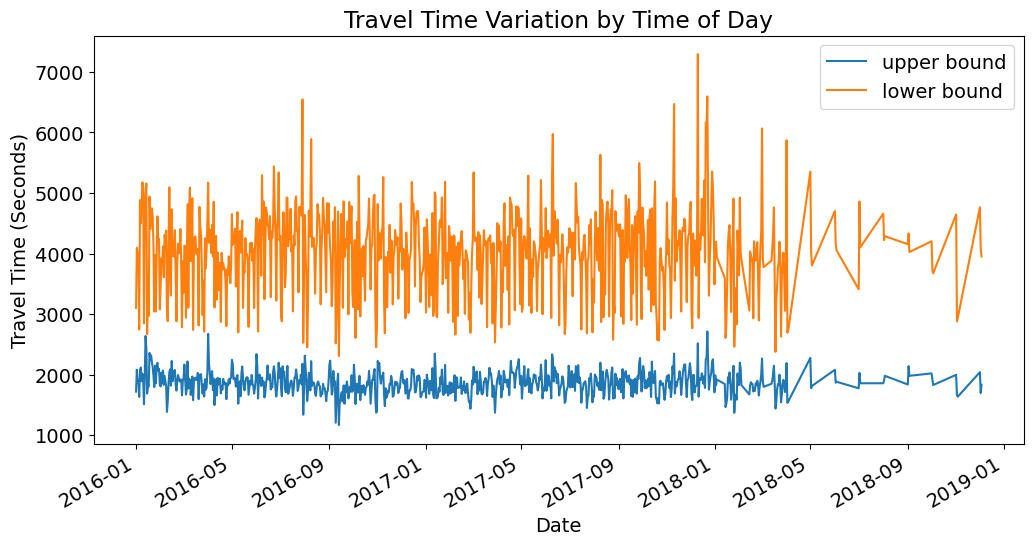

In [41]:
# Plot the travel time breakdown by time of day
fig, ax = plt.subplots(figsize=(12, 6))
df.plot(x='Date', y=['Daily_Range_-_Lower_Bound_Travel_Time_Seconds','Daily_Range_-_Upper_Bound_Travel_Time_Seconds'], kind='line', ax=ax)
plt.title('Travel Time Variation by Time of Day')
plt.xlabel('Date')
plt.ylabel('Travel Time (Seconds)')
plt.legend(['upper bound', 'lower bound'])
plt.show()

## Daily Mean Travel Time
line plot to show the daily mean travel time over different days. It visualizes how the average travel time changes day by day.


## Weekend vs Weekday Mean Travel Time
calculates and compares the mean travel time for weekends and weekdays from a given dataset. It then prints out the average travel times for both weekends and weekdays.

In [42]:
df['Day'] = df['Date'].dt.day_name()
weekend_mean = df[df['Day'].isin(['Saturday', 'Sunday'])]['Daily_Mean_Travel_Time_Seconds']
weekday_mean = df[~df['Day'].isin(['Saturday', 'Sunday'])]['Daily_Mean_Travel_Time_Seconds']
print(f"Mean travel time on weekends: {weekend_mean} seconds")
print(f"Mean travel time on weekdays: {weekday_mean} seconds")

Mean travel time on weekends: 1      2918
2      2738
8      3229
9      3119
17     2920
       ... 
806    2405
807    2281
818    3006
819    2704
820    2440
Name: Daily_Mean_Travel_Time_Seconds, Length: 236, dtype: int64 seconds
Mean travel time on weekdays: 0      2309
3      2755
4      2116
5      3179
6      3085
       ... 
813    2525
814    3439
815    2568
816    3388
817    2910
Name: Daily_Mean_Travel_Time_Seconds, Length: 585, dtype: int64 seconds


### Peak Day for Commuting

**Description:** This analysis identifies the day with the highest average travel time (the peak day).

**Purpose:** It assists commuters in planning their travel and avoiding congestion on peak days.


In [43]:
# 3. Peak hours and variations
peak_day = df['Daily_Mean_Travel_Time_Seconds'].idxmax()
print(f"Peak day for commuting: {df['Date'][peak_day].date()}")


Peak day for commuting: 2017-12-10


## Travel Time on Peak Day

In [44]:
peak_data = df.iloc[peak_day]
print(f"Travel time on peak day: {peak_data['Daily_Mean_Travel_Time_Seconds']} seconds")

Travel time on peak day: 4283 seconds


## Plotting Overall Daily Mean Travel Time for Specific Years

### Daily Mean Travel Time

**Description:** This visualization illustrates the average travel time over several days, showcasing changes in daily patterns.
**Purpose:** It allows for the observation of daily trends and variations.

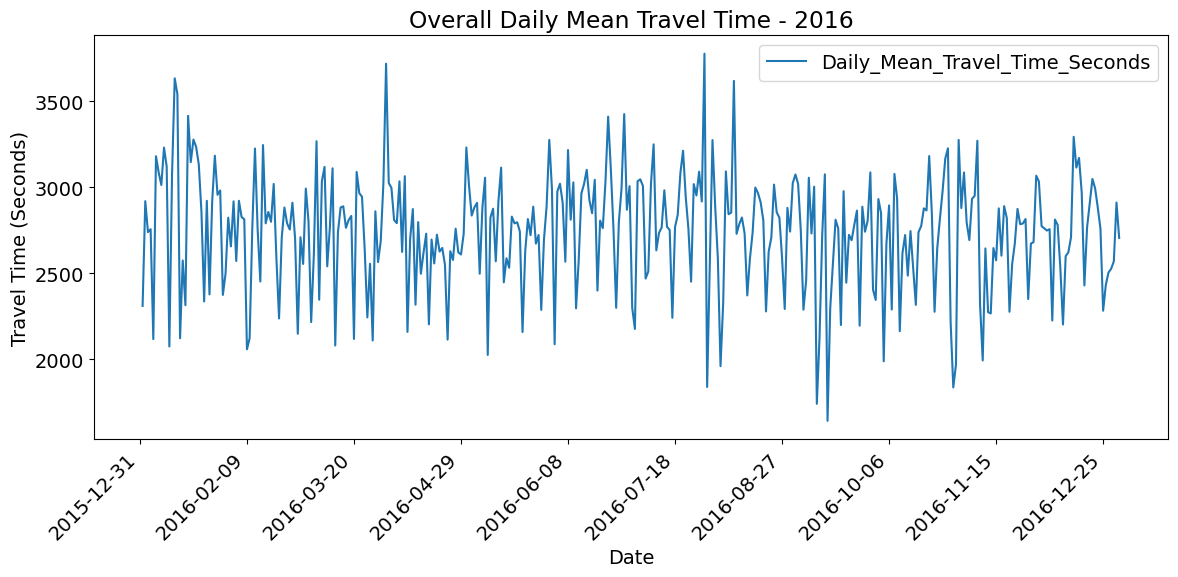

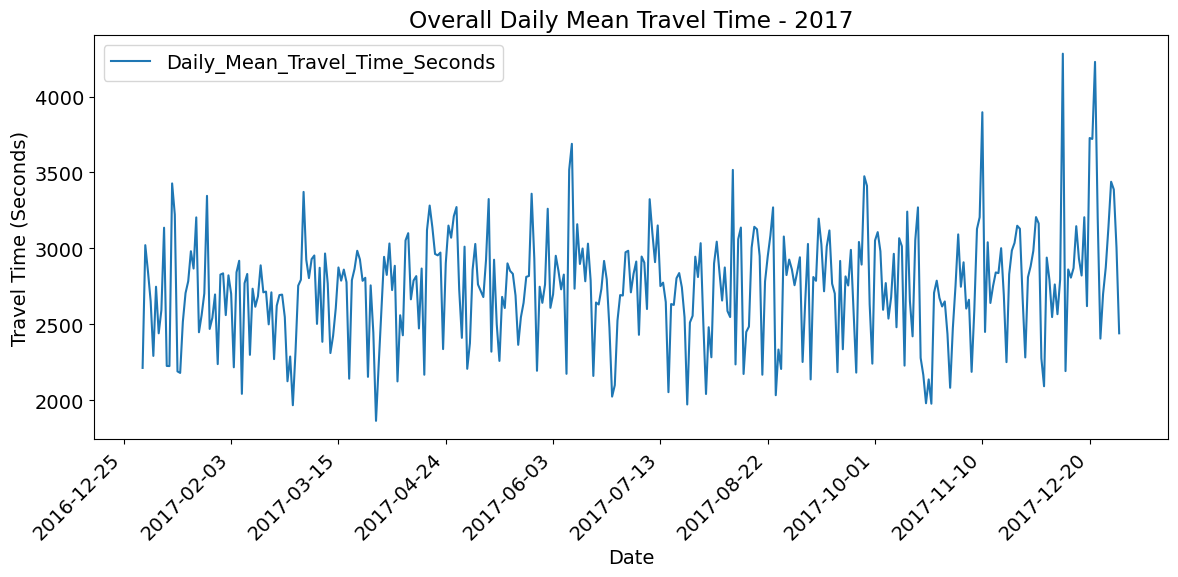

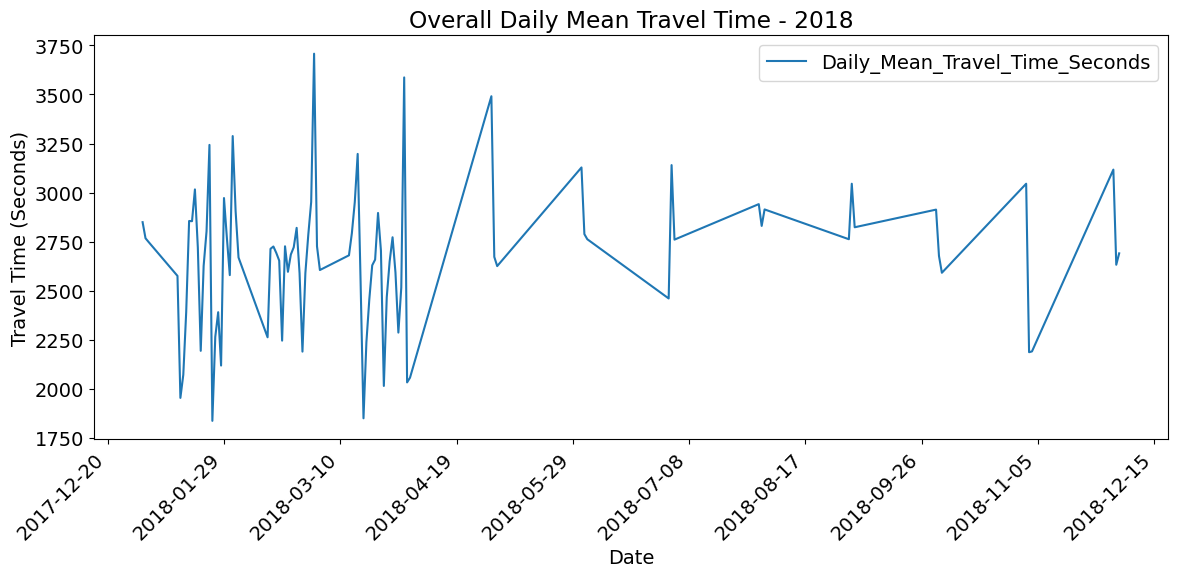

In [45]:
# Set font size for axis labels and tick labels
plt.rcParams.update({'font.size': 14})

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Filter DataFrame to include only the year 2016
df_2016 = df[df['Date'].dt.year == 2016]

# Create a single subplot for the overall daily mean travel time
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the overall daily mean travel time
df_2016.plot(x='Date', y='Daily_Mean_Travel_Time_Seconds', kind='line', ax=ax)
ax.set_title('Overall Daily Mean Travel Time - 2016')
ax.set_xlabel('Date')
ax.set_ylabel('Travel Time (Seconds)')

# Customize x-axis to display all months
ax.xaxis.set_major_locator(plt.MaxNLocator(12))  # Set maximum number of x-axis ticks to 12 (one for each month)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Display plot
plt.show()

# Repeat the above code for years 2017, 2018, and 2019 to show individual plots for each year
df_2017 = df[df['Date'].dt.year == 2017]
fig, ax = plt.subplots(figsize=(12, 6))
df_2017.plot(x='Date', y='Daily_Mean_Travel_Time_Seconds', kind='line', ax=ax)
ax.set_title('Overall Daily Mean Travel Time - 2017')
ax.set_xlabel('Date')
ax.set_ylabel('Travel Time (Seconds)')
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

df_2018 = df[df['Date'].dt.year == 2018]
fig, ax = plt.subplots(figsize=(12, 6))
df_2018.plot(x='Date', y='Daily_Mean_Travel_Time_Seconds', kind='line', ax=ax)
ax.set_title('Overall Daily Mean Travel Time - 2018')
ax.set_xlabel('Date')
ax.set_ylabel('Travel Time (Seconds)')
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



### Travel Time Variation by Time Periods

**Description:** This graph illustrates the average travel times during the morning (AM), afternoon (Midday), and evening (PM).
**Purpose:** It offers insights into the variations in travel time throughout the day.

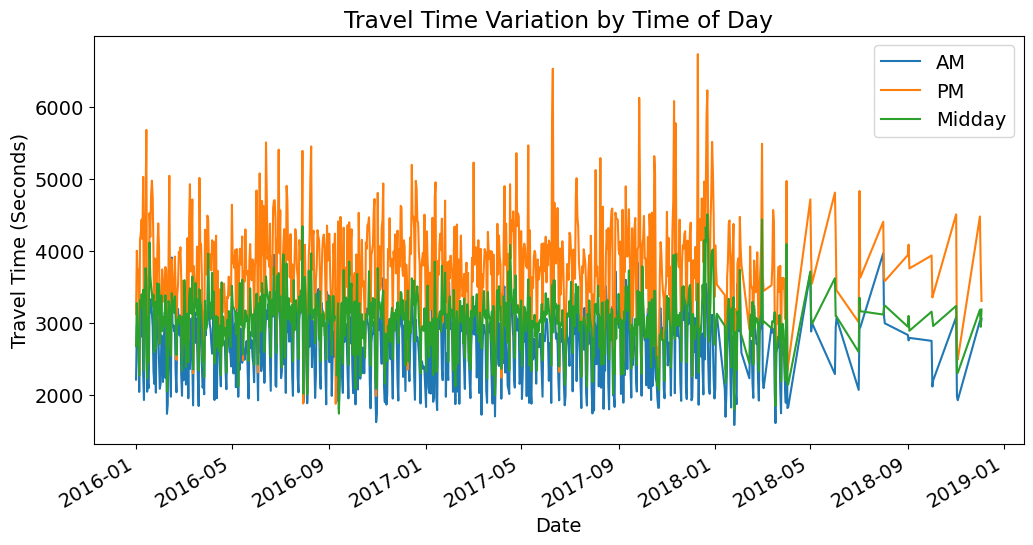

In [46]:
# Plot the travel time breakdown by time of day
fig, ax = plt.subplots(figsize=(12, 6))
df.plot(x='Date', y=['AM_Mean_Travel_Time_Seconds', 'PM_Mean_Travel_Time_Seconds', 'Midday_Mean_Travel_Time_Seconds'], kind='line', ax=ax)
plt.title('Travel Time Variation by Time of Day')
plt.xlabel('Date')
plt.ylabel('Travel Time (Seconds)')
plt.legend(['AM', 'PM', 'Midday'])
plt.show()

### Travel Time Heatmaps

**Description:** Heatmaps visualize travel time variations across different days and months.
**Purpose:** They offer a quick visualization to identify trends or patterns over time.


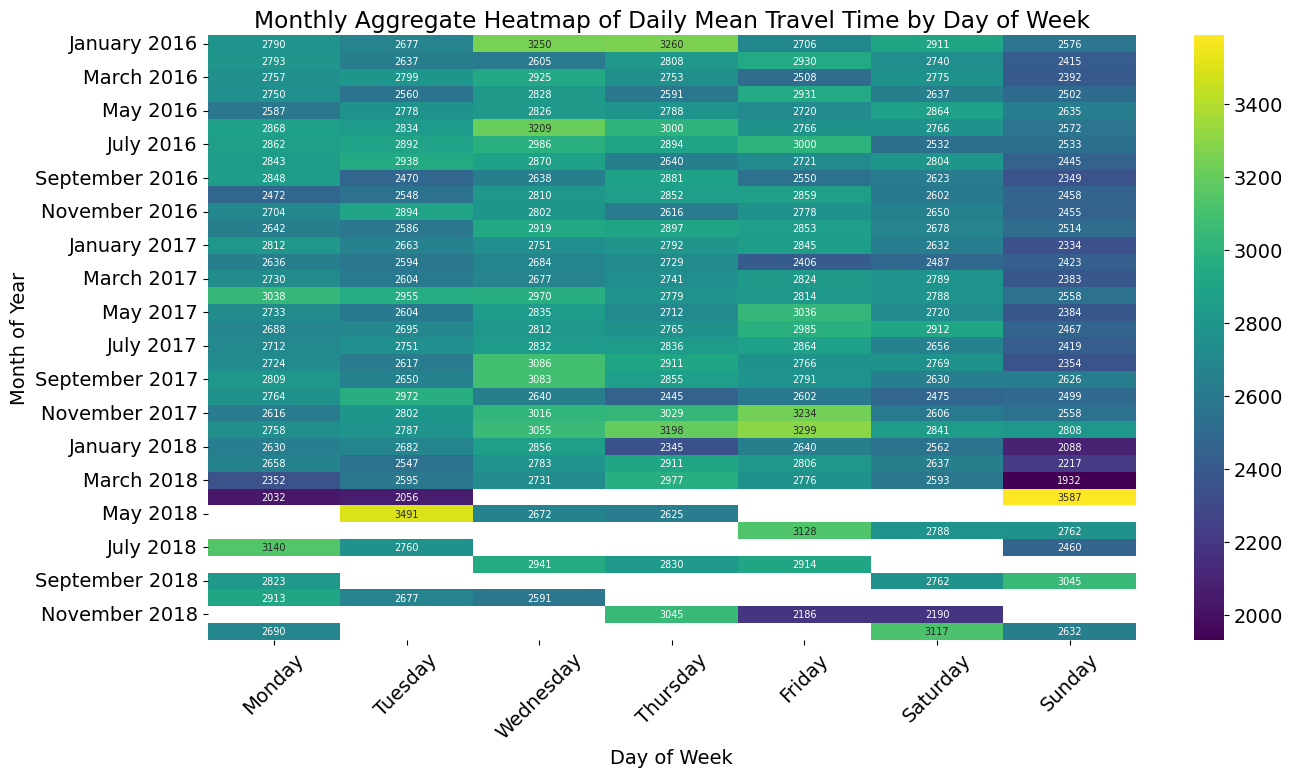

In [47]:
# Sorting data by 'Day of Week' after categorizing to ensure correct order
df['Day_of_Week'] = pd.Categorical(df['Day_of_Week'], categories=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
sorted_data = df.sort_values('Day_of_Week')

# Preparing data for heatmap
daily_means = sorted_data.pivot_table(index=pd.Grouper(key='Date', freq='W'), columns='Day_of_Week', values='Daily_Mean_Travel_Time_Seconds')

# Aggregating data monthly instead of weekly to reduce complexity
monthly_means = sorted_data.pivot_table(index=pd.Grouper(key='Date', freq='M'), columns='Day_of_Week', values='Daily_Mean_Travel_Time_Seconds')
# Format the index of monthly_means to month names
monthly_means.index = monthly_means.index.strftime('%B %Y')

# Recreate the heatmap with month names as row labels
plt.figure(figsize=(14, 8))  # Adjust figure size for better visibility
heatmap = sns.heatmap(monthly_means, cmap='viridis', annot=True, fmt=".0f", annot_kws={"size": 7})  # Adjust annotations for better fit
plt.title('Monthly Aggregate Heatmap of Daily Mean Travel Time by Day of Week')
plt.ylabel('Month of Year')
plt.xlabel('Day of Week')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit axis labels



### Interactive Line Plot

**Description:** This interactive line plot includes missing data as gaps, allowing users to easily analyze the daily average travel time.
**Purpose:** Users can interact with and visualize the travel time data dynamically.

In [48]:
# Handle missing data by ensuring every date is represented
# Creating a date range from the minimum to maximum date in the dataset
date_range = pd.date_range(start=df['Date'].min(), end=df['Date'].max(), freq='D')

# Group the data by date and compute the mean travel time, reindexing to the full date range to include missing dates
line_data_full = df.groupby(df['Date'].dt.date).agg({'Daily_Mean_Travel_Time_Seconds': 'mean'}).reindex(date_range.date, fill_value=np.nan)

# Rename columns for better clarity
line_data_full.rename(columns={'Daily_Mean_Travel_Time_Seconds': 'Mean Travel Time'}, inplace=True)

# Reset index to convert the index into a column
line_data_full.reset_index(inplace=True)
line_data_full.rename(columns={'index': 'Date'}, inplace=True)

# Create an updated interactive line plot showing all dates, including those with missing data
updated_line_plot = px.line(
    line_data_full,
    x='Date',
    y='Mean Travel Time',
    title='Daily Mean Travel Time Over the Year with Missing Data Indicated',
    labels={'Date': 'Date', 'Mean Travel Time': 'Travel Time (Seconds)'}
)

# Show the plot
updated_line_plot.show()

### Heatmaps by Time Period

**Description:** Heatmaps display travel time variations during the morning (AM) and evening (PM) time periods.
**Purpose:** They provide a visual representation of travel time patterns during different parts of the day.

#### AM Mean Travel Time
#### PM Mean Travel Time
#### Mid-Day Travel Time


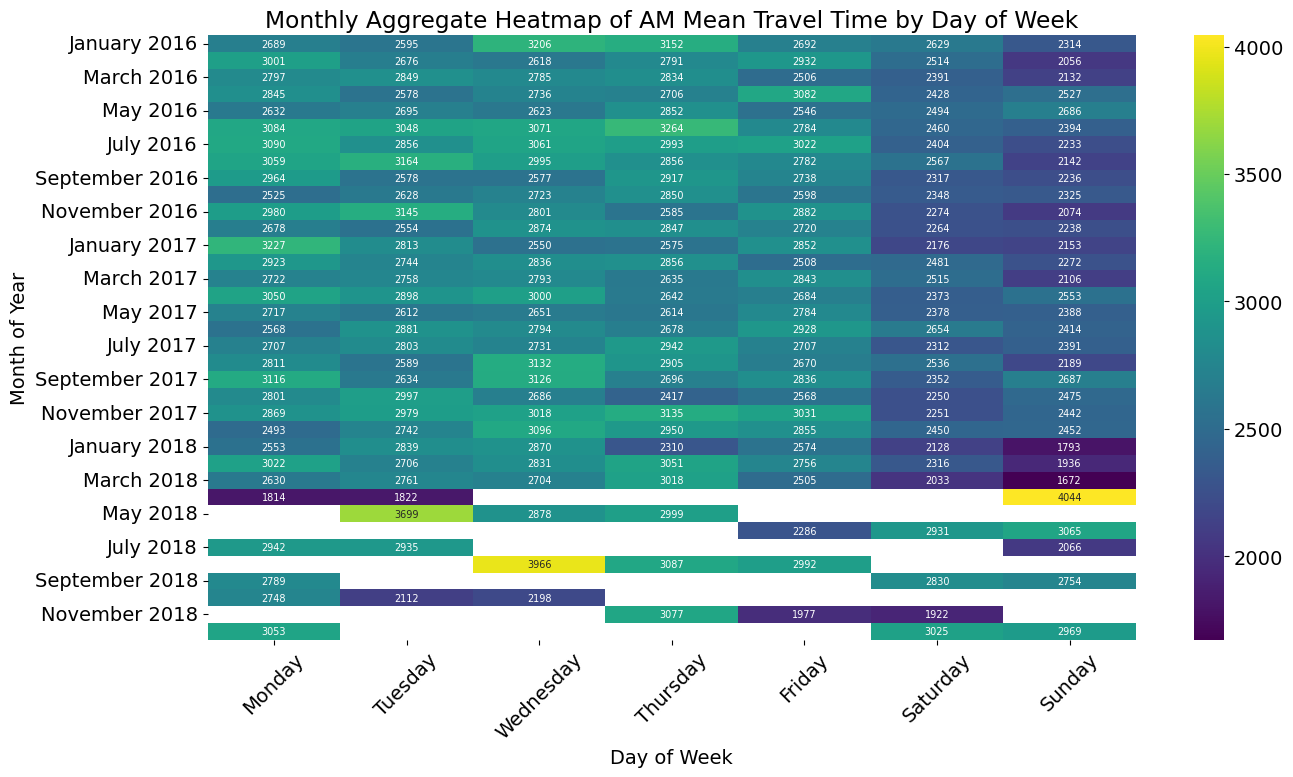

In [49]:
# Sorting data by 'Day of Week' after categorizing to ensure correct order
df['Day_of_Week'] = pd.Categorical(df['Day_of_Week'], categories=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
sorted_data = df.sort_values('Day_of_Week')

# Preparing data for heatmap
daily_means = sorted_data.pivot_table(index=pd.Grouper(key='Date', freq='W'), columns='Day_of_Week', values='AM_Mean_Travel_Time_Seconds')

# Aggregating data monthly instead of weekly to reduce complexity
monthly_means = sorted_data.pivot_table(index=pd.Grouper(key='Date', freq='M'), columns='Day_of_Week', values='AM_Mean_Travel_Time_Seconds')
# Format the index of monthly_means to month names
monthly_means.index = monthly_means.index.strftime('%B %Y')

# Recreate the heatmap with month names as row labels
plt.figure(figsize=(14, 8))  # Adjust figure size for better visibility
heatmap = sns.heatmap(monthly_means, cmap='viridis', annot=True, fmt=".0f", annot_kws={"size": 7})  # Adjust annotations for better fit
plt.title('Monthly Aggregate Heatmap of AM Mean Travel Time by Day of Week')
plt.ylabel('Month of Year')
plt.xlabel('Day of Week')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit axis labels

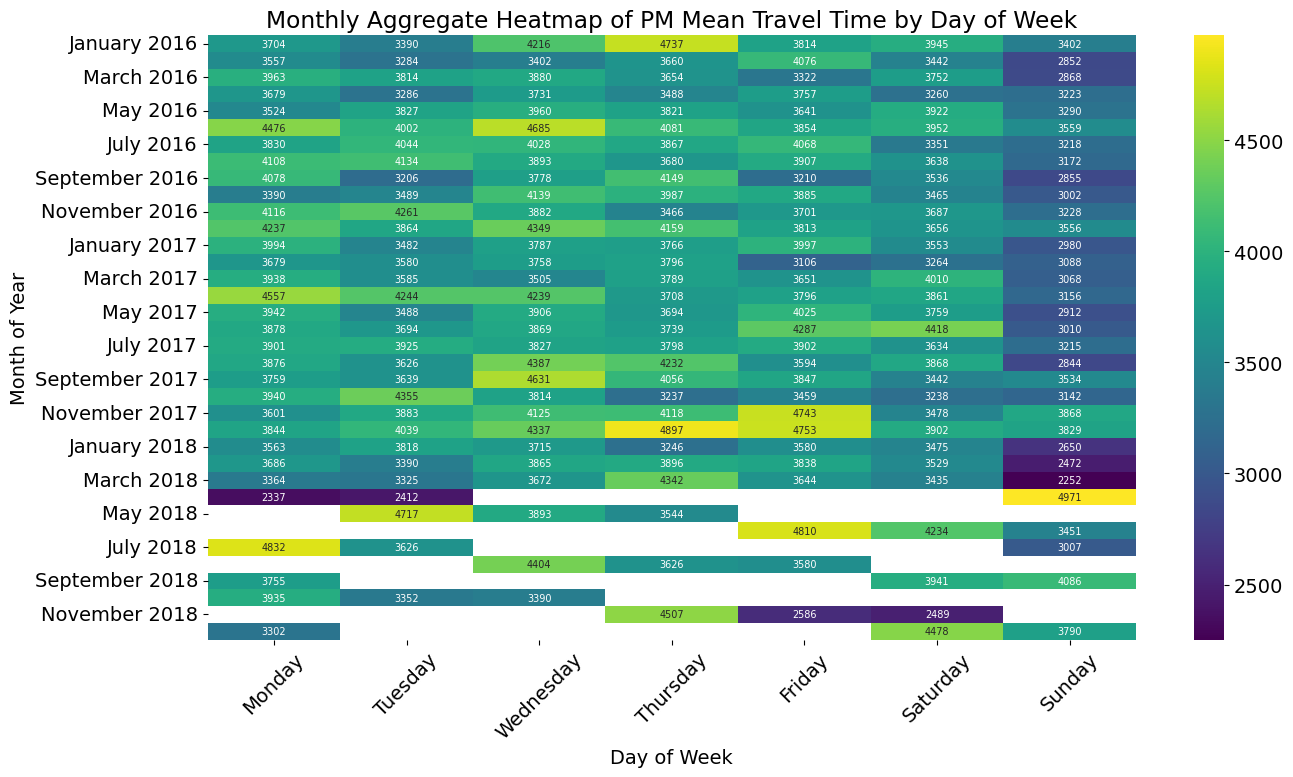

In [50]:
# Sorting data by 'Day of Week' after categorizing to ensure correct order
df['Day_of_Week'] = pd.Categorical(df['Day_of_Week'], categories=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
sorted_data = df.sort_values('Day_of_Week')

# Preparing data for heatmap
daily_means = sorted_data.pivot_table(index=pd.Grouper(key='Date', freq='W'), columns='Day_of_Week', values='PM_Mean_Travel_Time_Seconds')

# Aggregating data monthly instead of weekly to reduce complexity
monthly_means = sorted_data.pivot_table(index=pd.Grouper(key='Date', freq='M'), columns='Day_of_Week', values='PM_Mean_Travel_Time_Seconds')
# Format the index of monthly_means to month names
monthly_means.index = monthly_means.index.strftime('%B %Y')

# Recreate the heatmap with month names as row labels
plt.figure(figsize=(14, 8))  # Adjust figure size for better visibility
heatmap = sns.heatmap(monthly_means, cmap='viridis', annot=True, fmt=".0f", annot_kws={"size": 7})  # Adjust annotations for better fit
plt.title('Monthly Aggregate Heatmap of PM Mean Travel Time by Day of Week')
plt.ylabel('Month of Year')
plt.xlabel('Day of Week')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit axis labels

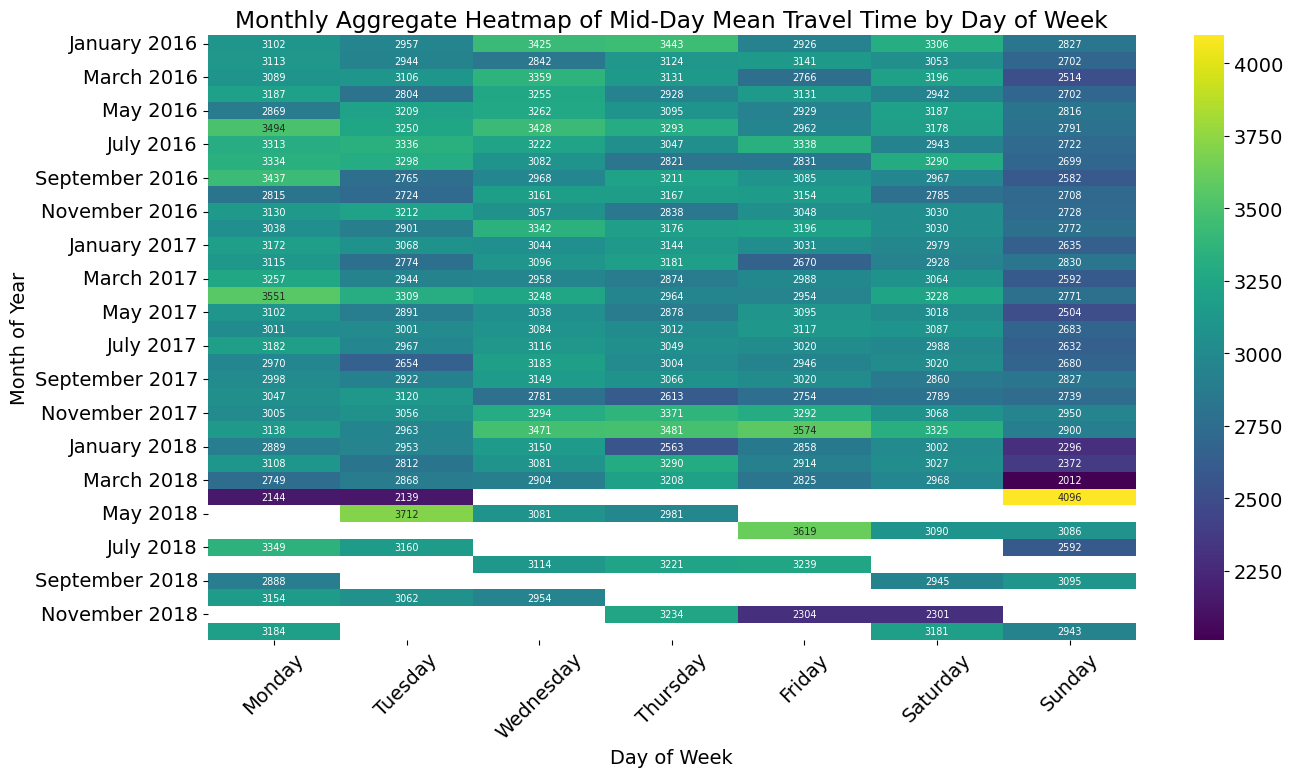

In [51]:
# Sorting data by 'Day of Week' after categorizing to ensure correct order
df['Day_of_Week'] = pd.Categorical(df['Day_of_Week'], categories=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
sorted_data = df.sort_values('Day_of_Week')

# Preparing data for heatmap
daily_means = sorted_data.pivot_table(index=pd.Grouper(key='Date', freq='W'), columns='Day_of_Week', values='Midday_Mean_Travel_Time_Seconds')

# Aggregating data monthly instead of weekly to reduce complexity
monthly_means = sorted_data.pivot_table(index=pd.Grouper(key='Date', freq='M'), columns='Day_of_Week', values='Midday_Mean_Travel_Time_Seconds')
# Format the index of monthly_means to month names
monthly_means.index = monthly_means.index.strftime('%B %Y')

# Recreate the heatmap with month names as row labels
plt.figure(figsize=(14, 8))  # Adjust figure size for better visibility
heatmap = sns.heatmap(monthly_means, cmap='viridis', annot=True, fmt=".0f", annot_kws={"size": 7})  # Adjust annotations for better fit
plt.title('Monthly Aggregate Heatmap of Mid-Day Mean Travel Time by Day of Week')
plt.ylabel('Month of Year')
plt.xlabel('Day of Week')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit axis labels